In [1]:
import matplotlib.pyplot as plt
import straph as sg

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Introduction

Formally, a stream graph $S = (T,V,W,E)$ is defined by a set of time instants $T$, a finite set of nodes $V$, a set of temporal nodes $W \subseteq T \times V$, and a set of temporal links $E\subseteq T \times V \times V$.
The set of time instants $T$ can be continuous or discrete. Likewise interactions (temporal links) between two nodes can be discrete $(b,b,u,v)$ or continuous $(b,e,u,v)$ (with $b,e \in T$ and $u,v \in V$).

Stream graphs can be used to model any connected structure evolving through time. For instance, IP traffic between entities can be modelised as follow: whenever two IP adresses exchanges packets we record a temporal link between these two nodes corresponding to the duration of the exchange.

First of all, we load an artificial example that will be used in the following steps of analysis and visualisation.

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                         path_links=path_directory + "example_links.sg")

## Basic visualisation

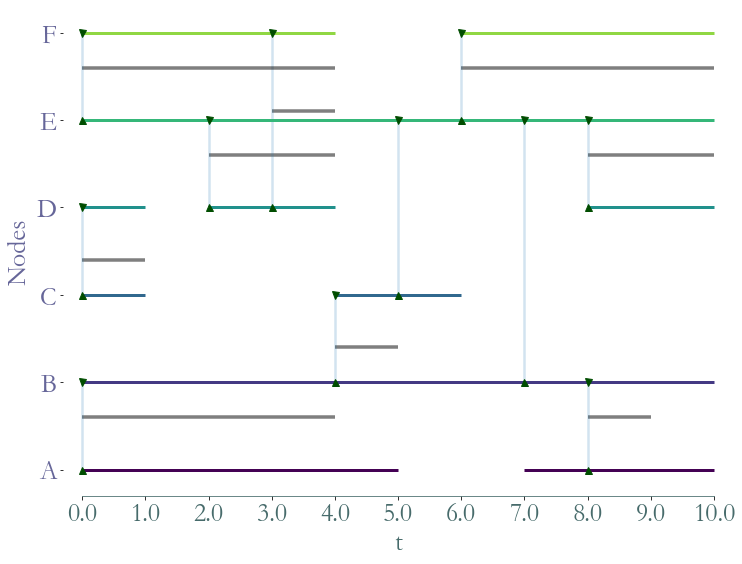

In [4]:
fig = S.plot()

We refer to this [Notebook](Drawing.ipynb) for more details on visualisation.

## Stream Graph Object

**Paradigme**: In ``Straph`` simple data structures should be represented by built-in python objects, resulting in a more comprehensive and intuitive code.

After a comparative analysis we choose to use the following data structures for manipulating stream graphs. (As numerous algorithms and basic computations are not based on vectorials operations ``Numpy`` arrays were deemed to slow.)

A ``StreamGraph`` object is constituted by five main attributes:

- ```times```: the time window of the stream graph ($T$)
- ```nodes```: the list of nodes present in the stream graph ($V$)
- ```node_presence```: a list of list, each list corresponds to a node and contains its presence time ($W$)
- ```links```: the list of links present in the stream graph ($E$)
- ```node_presence```: a list of list, each list corresponds to a link and contains its presence time ($E$)

In [5]:
S.times

[0.0, 10.0]

The stream graph spans from instant $0$ to $10$

In [6]:
S.nodes

[0, 1, 2, 3, 4, 5]

``S`` contains $6$ nodes.
Nodes are always represented by integers, their labels can be stored in the attribute ```node_to_label```.

In [7]:
S.node_to_label

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

In [8]:
S.node_presence

[[0.0, 5.0, 7.0, 10.0],
 [0.0, 10.0],
 [0.0, 1.0, 4.0, 6.0],
 [0.0, 1.0, 2.0, 4.0, 8.0, 10.0],
 [0.0, 10.0],
 [0.0, 4.0, 6.0, 10.0]]

As we can see on the above figure, node $A$ with index $0$ is present from time $0$ to $5$, absent from $5$ to $7$ and present again from $7$ to $10$.

In [9]:
S.links

[(0, 1), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

In [10]:
S.link_presence

[[0.0, 4.0, 8.0, 9.0],
 [4.0, 5.0],
 [7.0, 7.0],
 [0.0, 1.0],
 [5.0, 5.0],
 [2.0, 4.0, 8.0, 10.0],
 [3.0, 4.0],
 [0.0, 4.0, 6.0, 10.0]]

The link $(4,5)$ (corresponding to nodes $E$ and $F$) with index $5$ is active from time $0$ to $3$ and again from $7$ to $10$.

A short description of a stream graph scale can be obtained with ``.describe()``

In [11]:
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  8
Nb of segmented links :  11.0
Nb of event times :  11


We can add or remove nodes and links to/from a ``stream_graph`` object (we refer to this [notebook](Readers%20and%20Writers%20(Input-Output).ipynb) for further information).

We can easily add a new node. Let's add $G$ present from $0$ to $3$ and from $8$ to $9$.

In [12]:
S.add_node('G',[0,3,8,9])

6

Likewise we can add a new link. If one of the extrimities is new, it will be added automatically for the duration of the link.
Let's add a link $(G,H)$ from $1$ to $3$ and from $8$ to $9$.

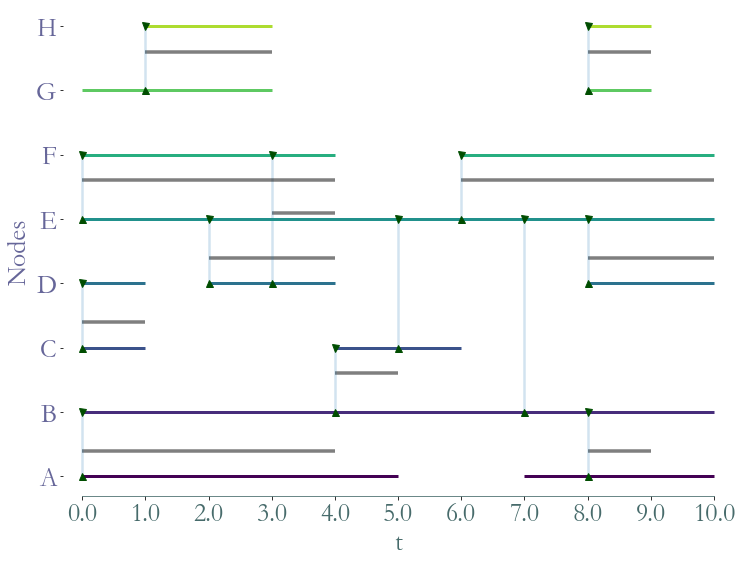

In [13]:
S.add_link(('G','H'),[1,3,8,9])
_ = S.plot()

Let's remove these new interactions between nodes $G$ and $H$.

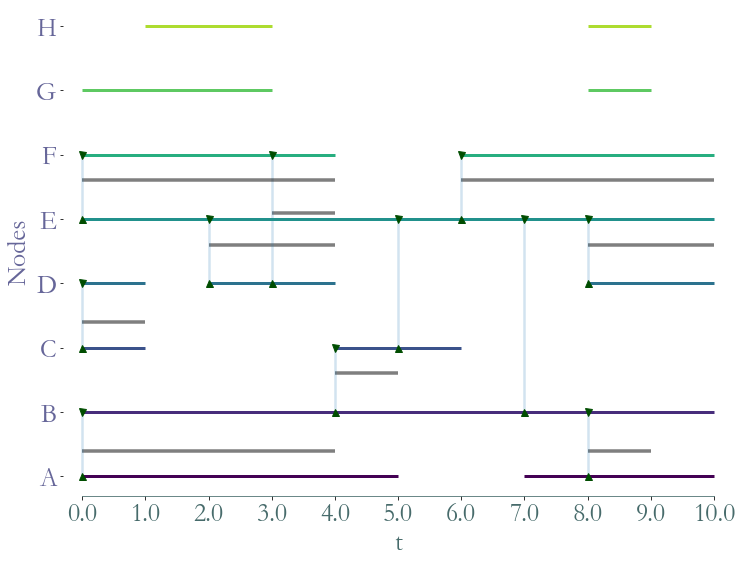

In [14]:
S.remove_link(('G','H'))
_ = S.plot()

*Note* : If we remove a node, all of its links will be automatically removed.

In [15]:
S.remove_node('G')
S.remove_node('H')

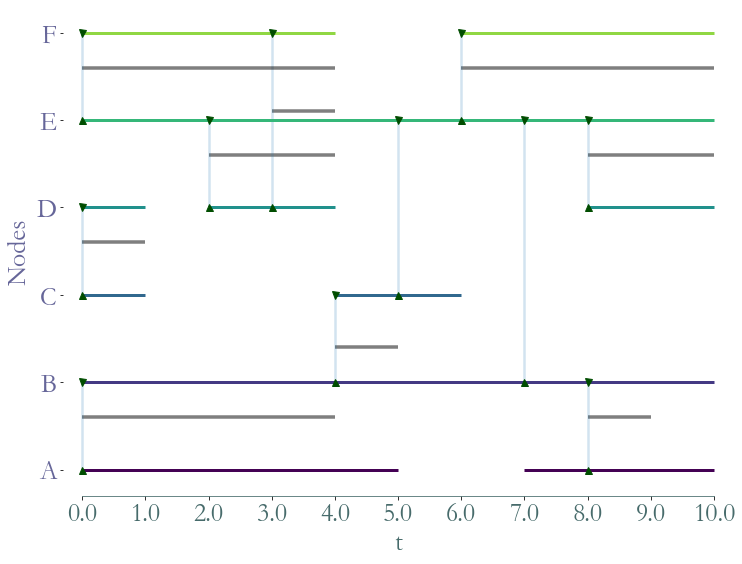

In [16]:
S.plot()
plt.show()

## Manipulating a Stream Graph Object

There are several manners to manipulate a ``StreamGraph`` object:
   - Iterate on nodes 
   - Iterate on links
   - Iterate on temporally ordered links
   - Iterate on temporally ordered events

In [17]:
for n,np in zip(S.nodes,S.node_presence):
    for b,e in zip(np[::2],np[1::2]): # Even index are arrivals and odd index departure
        print("Node ",S.node_to_label[n]," is present from ",b," to ",e)

Node  A  is present from  0.0  to  5.0
Node  A  is present from  7.0  to  10.0
Node  B  is present from  0.0  to  10.0
Node  C  is present from  0.0  to  1.0
Node  C  is present from  4.0  to  6.0
Node  D  is present from  0.0  to  1.0
Node  D  is present from  2.0  to  4.0
Node  D  is present from  8.0  to  10.0
Node  E  is present from  0.0  to  10.0
Node  F  is present from  0.0  to  4.0
Node  F  is present from  6.0  to  10.0


In [18]:
for l,lp in zip(S.links,S.link_presence):
    for b,e in zip(lp[::2],lp[1::2]): # Even index are arrivals and odd index departure
        u,v = l
        print("Link ",(S.node_to_label[u],S.node_to_label[v])," is present from ",b," to ",e)

Link  ('A', 'B')  is present from  0.0  to  4.0
Link  ('A', 'B')  is present from  8.0  to  9.0
Link  ('B', 'C')  is present from  4.0  to  5.0
Link  ('B', 'E')  is present from  7.0  to  7.0
Link  ('C', 'D')  is present from  0.0  to  1.0
Link  ('C', 'E')  is present from  5.0  to  5.0
Link  ('D', 'E')  is present from  2.0  to  4.0
Link  ('D', 'E')  is present from  8.0  to  10.0
Link  ('D', 'F')  is present from  3.0  to  4.0
Link  ('E', 'F')  is present from  0.0  to  4.0
Link  ('E', 'F')  is present from  6.0  to  10.0


In [19]:
for e in S.ordered_links():
    if e[0] == 1:
        _, t0, t1, u, v = e
        print("Link arrival \t:",(t0,t1,S.node_to_label[u],S.node_to_label[v]))
    if e[0] == -1:
        _, t1, u, v = e
        print("Link departure \t:",(t1,S.node_to_label[u],S.node_to_label[v]))

Link arrival 	: (0.0, 4.0, 'A', 'B')
Link arrival 	: (0.0, 1.0, 'C', 'D')
Link arrival 	: (0.0, 4.0, 'E', 'F')
Link departure 	: (1.0, 'C', 'D')
Link arrival 	: (2.0, 4.0, 'D', 'E')
Link arrival 	: (3.0, 4.0, 'D', 'F')
Link arrival 	: (4.0, 5.0, 'B', 'C')
Link departure 	: (4.0, 'A', 'B')
Link departure 	: (4.0, 'D', 'E')
Link departure 	: (4.0, 'D', 'F')
Link departure 	: (4.0, 'E', 'F')
Link arrival 	: (5.0, 5.0, 'C', 'E')
Link departure 	: (5.0, 'B', 'C')
Link departure 	: (5.0, 'C', 'E')
Link arrival 	: (6.0, 10.0, 'E', 'F')
Link arrival 	: (7.0, 7.0, 'B', 'E')
Link departure 	: (7.0, 'B', 'E')
Link arrival 	: (8.0, 9.0, 'A', 'B')
Link arrival 	: (8.0, 10.0, 'D', 'E')
Link departure 	: (9.0, 'A', 'B')
Link departure 	: (10.0, 'D', 'E')
Link departure 	: (10.0, 'E', 'F')


In [20]:
for e in S.ordered_events():
    if e[0] == 2:
        _,t0,t1,u = e
        print("Node arrival \t:",(t0,t1,S.node_to_label[u]))
    elif e[0] == 1:
        _, t0, t1, u, v = e
        print("Link arrival \t:",(t0,t1,S.node_to_label[u],S.node_to_label[v]))
    elif e[0] == -1:
        _, t1, u, v = e
        print("Link departure \t:",(t1,S.node_to_label[u],S.node_to_label[v]))
    elif e[0] == -2:
        _,t1,u = e
        print("Node departure \t:",(t1,S.node_to_label[u]))


Node arrival 	: (0.0, 5.0, 'A')
Node arrival 	: (0.0, 10.0, 'B')
Node arrival 	: (0.0, 1.0, 'C')
Node arrival 	: (0.0, 1.0, 'D')
Node arrival 	: (0.0, 10.0, 'E')
Node arrival 	: (0.0, 4.0, 'F')
Link arrival 	: (0.0, 4.0, 'A', 'B')
Link arrival 	: (0.0, 1.0, 'C', 'D')
Link arrival 	: (0.0, 4.0, 'E', 'F')
Link departure 	: (1.0, 'C', 'D')
Node departure 	: (1.0, 'C')
Node departure 	: (1.0, 'D')
Node arrival 	: (2.0, 4.0, 'D')
Link arrival 	: (2.0, 4.0, 'D', 'E')
Link arrival 	: (3.0, 4.0, 'D', 'F')
Node arrival 	: (4.0, 6.0, 'C')
Link arrival 	: (4.0, 5.0, 'B', 'C')
Link departure 	: (4.0, 'A', 'B')
Link departure 	: (4.0, 'D', 'E')
Link departure 	: (4.0, 'D', 'F')
Link departure 	: (4.0, 'E', 'F')
Node departure 	: (4.0, 'D')
Node departure 	: (4.0, 'F')
Link arrival 	: (5.0, 5.0, 'C', 'E')
Link departure 	: (5.0, 'B', 'C')
Link departure 	: (5.0, 'C', 'E')
Node departure 	: (5.0, 'A')
Node arrival 	: (6.0, 10.0, 'F')
Link arrival 	: (6.0, 10.0, 'E', 'F')
Node departure 	: (6.0, 'C')


In ``Straph`` almost all algorithms are based on these data structures.